In [7]:
import numpy as np

In [8]:
# 세팅
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squred_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [9]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 예1: '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squred_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squred_error(np.array(y), np.array(t))

0.09750000000000003


0.5975

In [10]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [11]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [12]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [13]:
from locale import normalize
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [14]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [15]:
np.random.choice(60000, 10)

array([ 7136, 57110,  7416, 46069, 32342,  3140, 57965,  9450,  5130,
       21761])

In [16]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size # batch_size



In [17]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size



In [18]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [19]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [20]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

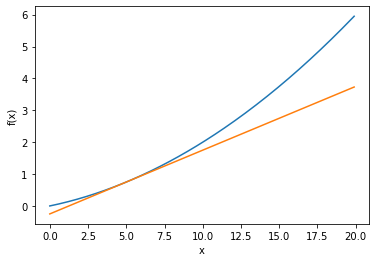

In [21]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y1 = function_1(x)
y2 = numerical_diff(function_1, 5)*(x-5) + function_1(5)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [22]:
numerical_diff(function_1, 5)

0.1999999999990898

In [23]:
numerical_diff(function_1, 10)

0.2999999999986347

In [24]:
def function_2(x):
    return x[0]**2 + x[1]**2 # x1^2 + x2^2
    # 또는 return np.sum(x**2)

In [25]:
# x0에 대한 편미분(x0 = 3, x1 = 4 고정이다.)
def function_tmp1(x0):
    return x0*x0 + 4.0*2.0 # x1 고정하고, 변수는 x0 하나.

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [26]:
# x1에 대한 편미분(x0 = 3, x1 = 4 고정이다.)
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1 # x0 고정하고, 변수는 x1 하나.

numerical_diff(function_tmp2, 4.0)

7.999999999999119

편미분도 변수가 하나인 특정 장소의 기울기를 구한다. 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

In [27]:
# 4.4 기울기

def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 값 복원

    return grad
        

In [28]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [29]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [30]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [31]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x


In [32]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [33]:
# 학습률이 너무 큰 예: lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [34]:
## 학습률이 너무 큰 예: lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [35]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) #정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [36]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
np.argmax(p)

[[ 0.25890222 -1.50000492  0.91375942]
 [-0.36647729 -0.42375209  1.72564337]]
[-0.17448823 -1.28137983  2.10133468]


2

In [37]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.12810074249692077

In [38]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.05421762  0.01792353 -0.07214115]
 [ 0.08132643  0.0268853  -0.10821173]]


In [39]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)